In [16]:
!pip install tensorflowjs

In [17]:
!unzip cell_images.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
import numpy as np # linear algebra,  Optimization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), read phtotos
import matplotlib.pyplot as plt #print/plot data
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2 #preprocessing library
import tensorflow as tf #below are the componenets of TF
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Flatten #TF ends
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split # 80:20 split images in infacted and uninfacted and send it to train model and shuffle images too
import tensorflow.keras.backend as K
from sklearn.utils import shuffle
# Any results you write to the current directory are saved as output.

In [19]:
print(tf.__version__) #says the version of Tensor Flow

2.4.1


In [24]:
X_para = [] #input or feature/label
Y_para = [] #output or Target
myfiles = glob.glob("./cell_images/Parasitized/*.png") #glob is library ion python to read file data
for file in myfiles:
    kernel = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]]) #using numpy bcz its faster, Kalman filter
    img = cv2.filter2D(cv2.resize(cv2.imread(file), (120, 120)), -1, kernel)
    image_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
    X_para.append(image)
    Y_para.append(1)

X_un, Y_un = [], []
unfiles = glob.glob("./cell_images/Uninfected/*.png")
for file in unfiles:
    kernel = np.array([[0, -1, 0], [-1, 7, -1], [0, -1, 0]])
    img = cv2.filter2D(cv2.resize(cv2.imread(file), (120, 120)), -1, kernel)
    X_un.append(img)
    Y_un.append(0)

X = X_para + X_un
Y = Y_para + Y_un

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=18
) #Split dataset imgs to 80:20 ratio

In [25]:
image_size=[120,120,3]

In [26]:
inp = Input(shape = (120 , 120 , 3)) #input is tensor flow's function, image shape
x = Conv2D(filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(inp)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 32 , kernel_size = (4,4) , strides = (2,2) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 64 , kernel_size = (3,3) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 128 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 256 , kernel_size = (2,2) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = AveragePooling2D(pool_size = (3,3) , strides = (1,1) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(120)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(60)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(10)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)
output = Activation("sigmoid")(x)
model  = Model(inputs =inp , outputs = output )

In [27]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 118, 118, 16)      448       
_________________________________________________________________
activation_9 (Activation)    (None, 118, 118, 16)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 118, 118, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 58, 58, 32)        8224      
_________________________________________________________________
activation_10 (Activation)   (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0   

In [28]:
history = model.fit(np.array(X_train) ,np.array(Y_train) , epochs = 13 ,validation_split = 0.2 )

Epoch 1/13
552/552 [==============================] - 189s 339ms/step - loss: 0.7924 - accuracy: 0.6982 - val_loss: 0.0694 - val_accuracy: 0.9875
Epoch 2/13
552/552 [==============================] - 176s 319ms/step - loss: 0.0962 - accuracy: 0.9603 - val_loss: 0.0794 - val_accuracy: 0.9866
Epoch 3/13
552/552 [==============================] - 175s 317ms/step - loss: 0.0789 - accuracy: 0.9743 - val_loss: 0.0320 - val_accuracy: 0.9918
Epoch 4/13
552/552 [==============================] - 180s 326ms/step - loss: 0.0623 - accuracy: 0.9876 - val_loss: 0.0334 - val_accuracy: 0.9921
Epoch 5/13
552/552 [==============================] - 192s 348ms/step - loss: 0.0477 - accuracy: 0.9908 - val_loss: 0.0207 - val_accuracy: 0.9939
Epoch 6/13
552/552 [==============================] - 182s 329ms/step - loss: 0.0340 - accuracy: 0.9933 - val_loss: 0.0212 - val_accuracy: 0.9937
Epoch 7/13
552/552 [==============================] - 172s 312ms/step - loss: 0.0208 - accuracy: 0.9962 - val_loss: 0.0149 -

In [29]:
# gives output in 2d array
y_pre = model.predict(np.array(X_test))
# converting 2d array into 1d arrray
y_pre = np.reshape(y_pre ,(5512,) )
print(y_pre)

Y_test = np.array(Y_test)
fil = y_pre > 0.8
y_pre[fil] = 1
fil = y_pre < 0.8
y_pre[fil] = 0

# printing accuracy of th test dataset
np.sum(Y_test == y_pre)/5512

[1.0000000e+00 1.0000000e+00 1.0524799e-06 ... 1.0000000e+00 1.0000000e+00
 1.4737736e-07]


0.997822931785196

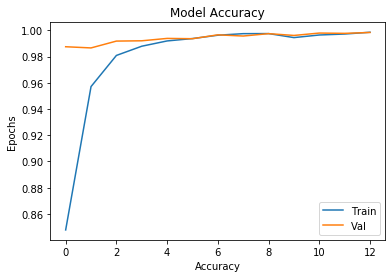

In [31]:
# plotting Accuracy plot of training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

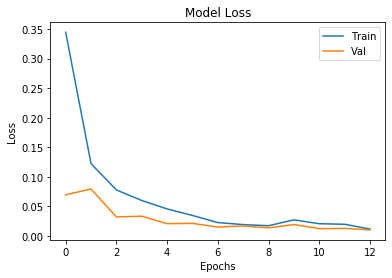

In [32]:
# plotting loss of training and validation dataset
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [33]:
import time 

saved_model_path = "./{}.h5".format(int(time.time()))
# saved_model_path = "tmp/saved_models/{}".format(int(time.time()))
print(saved_model_path)
model.save(saved_model_path)

# tf.keras.experimental.export_savd_model(model, saved_model_path)

./1617335162.h5


In [34]:
!tensorflowjs_converter --input_format=keras ./1613366833.h5 ./

2021-04-01 23:46:04.108379: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-01 23:46:04.108512: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "c:\users\aayus\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\aayus\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\aayus\Anaconda3\Scripts\tensorflowjs_converter.exe\__main__.py", line 9, in <module>
  File "c:\users\aayus\anaconda3\lib\site-packages\tensorflowjs\converters\converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "c:\users\aayus\anaconda3\lib\site-packages\tensorflowjs\converters\converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "c:\users\aayus\anaconda3\l